In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving dfa-generation-levels-detail-cleanedup.csv to dfa-generation-levels-detail-cleanedup (2).csv


In [4]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
wealth_gap_df = pd.read_csv("dfa-generation-levels-detail-cleanedup.csv")
# wealth_gap_df.set_index('Year (Q4)', inplace=True)
# wealth_gap_df = wealth_gap_df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)

# Update dataframe to include Year column based on date, this will be used to sum by year vs quarter
# Convert the 'Date' column to datetime
wealth_gap_df['Date'] = pd.to_datetime(wealth_gap_df['Date'], format='%Y:Q%m')

# Extract the year and create a new column 'Year'
wealth_gap_df['Year'] = wealth_gap_df['Date'].dt.year

# Review the DataFrame
wealth_gap_df.head(10)

,Date,Category,Assets,Liabilities,Net worth,Household count,Year
0,1989-03-01,Silent,17649120,1267424,16381696,48553376,1989
1,1989-03-01,BabyBoom,5808847,1831588,3977259,39289625,1989
2,1989-03-01,GenX,131077,53761,77316,5177100,1989
3,1989-03-01,Millennial,0,0,0,0,1989
4,1989-04-01,Silent,17908857,1290657,16618200,48581895,1989
5,1989-04-01,BabyBoom,5981476,1876276,4105200,39314788,1989
6,1989-04-01,GenX,151381,60610,90771,5366102,1989
7,1989-04-01,Millennial,0,0,0,0,1989
8,1990-01-01,Silent,17971608,1310509,16661098,48563739,1990
9,1990-01-01,BabyBoom,6022556,1911364,4111192,39352975,1990


In [5]:
# Group by 'Year' and 'Category' and calculate the mean
wealth_gap_df_grouped = wealth_gap_df.groupby(['Year', 'Category']).mean()
wealth_gap_df_grouped = wealth_gap_df_grouped.drop(['Date'],axis=1)
wealth_gap_df_grouped

Assets  Liabilities    Net worth  Household count
Year Category                                                          
1989 BabyBoom     5895161.50   1853932.00   4041229.50       39302206.5
     GenX          141229.00     57185.50     84043.50        5271601.0
     Millennial         0.00         0.00         0.00              0.0
     Silent      17778988.50   1279040.50  16499948.00       48567635.5
1990 BabyBoom     6135715.75   1964505.75   4171210.00       39440048.5
...                      ...          ...          ...              ...
2022 Silent      20511935.25    633909.75  19878025.50       12973394.5
2023 BabyBoom    78462569.25   4506630.75  73955938.50       41544772.0
     GenX        43574904.25   7028961.50  36545943.00       35113387.0
     Millennial  19671780.75   6840971.00  12830810.25       43397337.0
     Silent      20126535.75    583291.75  19543244.00       12073544.0

[140 rows x 4 columns]

In [6]:
# 1000000 to make a trillion
wealth_gap_df_grouped["Assets"] = wealth_gap_df_grouped["Assets"]
# * 10000000
wealth_gap_df_grouped["Liabilities"] = wealth_gap_df_grouped["Liabilities"]
# * 10000000
wealth_gap_df_grouped["Net worth"] = wealth_gap_df_grouped["Net worth"]
# * 10000000
wealth_gap_df_grouped

Assets  Liabilities    Net worth  Household count
Year Category                                                          
1989 BabyBoom     5895161.50   1853932.00   4041229.50       39302206.5
     GenX          141229.00     57185.50     84043.50        5271601.0
     Millennial         0.00         0.00         0.00              0.0
     Silent      17778988.50   1279040.50  16499948.00       48567635.5
1990 BabyBoom     6135715.75   1964505.75   4171210.00       39440048.5
...                      ...          ...          ...              ...
2022 Silent      20511935.25    633909.75  19878025.50       12973394.5
2023 BabyBoom    78462569.25   4506630.75  73955938.50       41544772.0
     GenX        43574904.25   7028961.50  36545943.00       35113387.0
     Millennial  19671780.75   6840971.00  12830810.25       43397337.0
     Silent      20126535.75    583291.75  19543244.00       12073544.0

[140 rows x 4 columns]

In [7]:



wealth_gap_df_grouped['Assets per HH'] = wealth_gap_df_grouped['Assets'] / wealth_gap_df_grouped['Household count']
wealth_gap_df_grouped['Liabilities per HH'] = wealth_gap_df_grouped['Liabilities'] / wealth_gap_df_grouped['Household count']
wealth_gap_df_grouped['Net Worth per HH'] = wealth_gap_df_grouped['Net worth'] / wealth_gap_df_grouped['Household count']



# Reset the index to make 'Year' and 'Category' normal columns again
# gen_level_details_grouped.reset_index(inplace=True)

# Display the DataFrame
wealth_gap_df_grouped.head(10)

Assets  Liabilities    Net worth  Household count  \
Year Category                                                             
1989 BabyBoom     5895161.50   1853932.00   4041229.50      39302206.50   
     GenX          141229.00     57185.50     84043.50       5271601.00   
     Millennial         0.00         0.00         0.00             0.00   
     Silent      17778988.50   1279040.50  16499948.00      48567635.50   
1990 BabyBoom     6135715.75   1964505.75   4171210.00      39440048.50   
     GenX          194122.00     82030.00    112092.25       5997507.50   
     Millennial         0.00         0.00         0.00             0.00   
     Silent      18188977.25   1338003.25  16850973.50      48428945.50   
1991 BabyBoom     6732969.50   2083301.50   4649668.00      39767957.75   
     GenX          300163.25    117209.00    182954.50       7342609.00   

                 Assets per HH  Liabilities per HH  Net Worth per HH  
Year Category                                                         
1989 BabyBoom         0.149996            0.047171          0.102824  
     GenX             0.026791            0.010848          0.015943  
     Millennial            NaN                 NaN               NaN  
     Silent           0.366067            0.026335          0.339731  
1990 BabyBoom         0.155571            0.049810          0.105761  
     GenX             0.032367            0.013677          0.018690  
     Millennial            NaN                 NaN               NaN  
     Silent           0.375581            0.027628          0.347953  
1991 BabyBoom         0.169306            0.052386          0.116920  
     GenX             0.040880            0.015963          0.024917

In [8]:
wealth_gap_df_grouped.dtypes

Assets                float64
Liabilities           float64
Net worth             float64
Household count       float64
Assets per HH         float64
Liabilities per HH    float64
Net Worth per HH      float64
dtype: object

In [9]:
wealth_gap_df_grouped_reset_cat = wealth_gap_df_grouped.reset_index(level='Category')
# wealth_gap_df_grouped_reset_cat


plot_boomer_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "BabyBoom")]
plot_mill_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "Millennial")]
plot_genx_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "GenX")]

# boomer HH + formatting
plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_boomer_filtered['Liabilities per HH'] = plot_boomer_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_boomer_filtered['Net Worth per HH'] = plot_boomer_filtered['Net Worth per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)

# gen x HH + formatting
plot_genx_filtered['Assets per HH'] = plot_genx_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_genx_filtered['Liabilities per HH'] = plot_genx_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_genx_filtered['Net Worth per HH'] = plot_genx_filtered['Net Worth per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)

# millenial HH + formatting
plot_mill_filtered = plot_mill_filtered.dropna(how='any')
plot_mill_filtered['Assets per HH'] = plot_mill_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_mill_filtered['Liabilities per HH'] = plot_mill_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_mill_filtered['Net Worth per HH'] = plot_mill_filtered['Net Worth per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)

# plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].str.replace(',', '').astype(int)
# plot_boomer_filtered
# plot_mill_filtered

<ipython-input-9-0c113fec604c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
<ipython-input-9-0c113fec604c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_boomer_filtered['Liabilities per HH'] = plot_boomer_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
<ipython-input-9-0c113fec604c>:12: SettingWithCopyWarning: 
A value is try

In [10]:
# plot_boomer_filtered.dtypes
# plot_genx_filtered.dytpes
plot_genx_filtered.dtypes
# plot_mill_filtered.dtypes

Category               object
Assets                float64
Liabilities           float64
Net worth             float64
Household count       float64
Assets per HH           int64
Liabilities per HH      int64
Net Worth per HH        int64
dtype: object

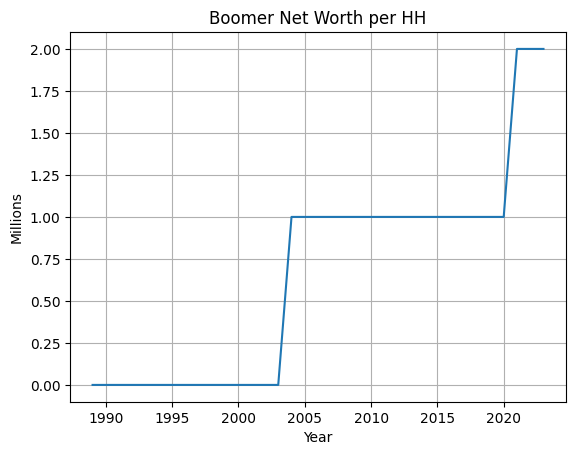

In [11]:
# Plot the general trends
plot_boomer_filtered['Net Worth per HH'].plot()

plt.title('Boomer Net Worth per HH')
plt.xlabel('Year')
plt.ylabel('Millions')
plt.grid(True)
plt.show()

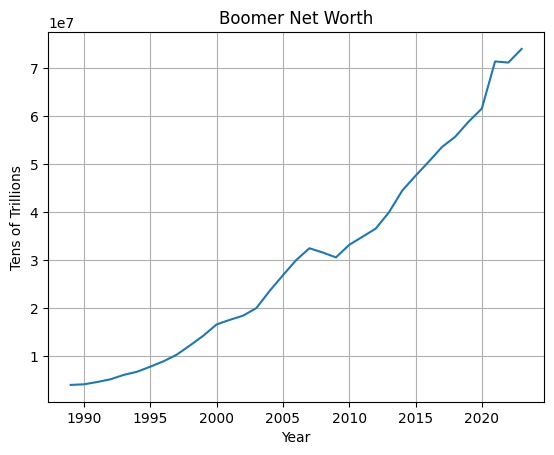

In [12]:
# Plot the general trends
plot_boomer_filtered["Net worth"].plot()

plt.title('Boomer Net Worth')
plt.xlabel('Year')
plt.ylabel('Tens of Trillions')
plt.grid(True)
plt.show()

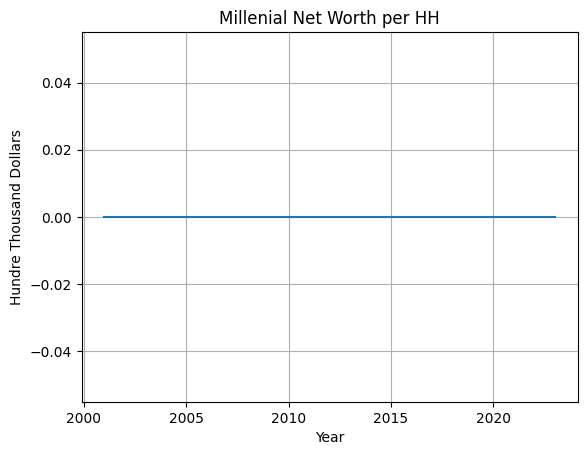

In [13]:
plot_mill_filtered['Net Worth per HH'].plot()

plt.title('Millenial Net Worth per HH')
plt.xlabel('Year')
plt.ylabel('Hundre Thousand Dollars')
plt.grid(True)
plt.show()

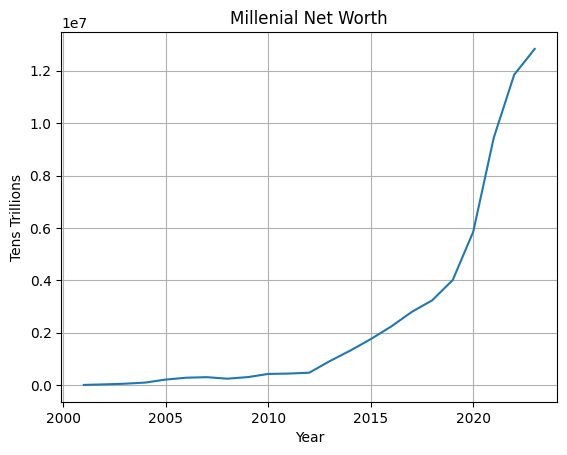

In [14]:
# Plot the general trends
plot_mill_filtered["Net worth"].plot()

plt.title('Millenial Net Worth')
plt.xlabel('Year')
plt.ylabel('Tens Trillions')
plt.grid(True)
plt.show()

In [15]:
# Using the DataFrame, reset the index so the date information is no longer the index
plot_boomer_filtered_update = plot_boomer_filtered.reset_index()
plot_genx_filtered_update = plot_genx_filtered.reset_index()
plot_mill_filtered_update = plot_mill_filtered.reset_index()



wealth_gap_prophet_df_babyboom = plot_boomer_filtered_update[["Year", "Net worth"]]
wealth_gap_prophet_df_genx = plot_genx_filtered_update[["Year", "Net worth"]]
wealth_gap_prophet_df_millennial = plot_mill_filtered_update[["Year", "Net worth"]]
# wealth_gap_prophet_df_silent = wealth_gap_prophet_df_update["Silent"]

# Label the columns ds and y so that the syntax is recognized by Prophet
wealth_gap_prophet_df_genx.columns = ['ds', 'y']
wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

# change to date time object
wealth_gap_prophet_df_genx['ds'] = pd.to_datetime(wealth_gap_prophet_df_genx['ds'], format='%Y')
wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')
wealth_gap_prophet_df_millennial['ds'] = pd.to_datetime(wealth_gap_prophet_df_millennial['ds'], format='%Y')


# wealth_gap_prophet_df_babyboom
# wealth_gap_prophet_df_millennial
wealth_gap_prophet_df_genx



<ipython-input-15-18ff74654abc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_gap_prophet_df_genx['ds'] = pd.to_datetime(wealth_gap_prophet_df_genx['ds'], format='%Y')
<ipython-input-15-18ff74654abc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')
<ipython-input-15-18ff74654abc>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,ds,y
0,1989-01-01,84043.50
1,1990-01-01,112092.25
2,1991-01-01,182954.50
3,1992-01-01,234039.00
4,1993-01-01,325200.50
5,1994-01-01,358330.00
6,1995-01-01,517098.75
7,1996-01-01,671400.50
8,1997-01-01,977214.50
9,1998-01-01,1385198.75


In [16]:
# Create a Prophet model for gen x
model_genx = Prophet()

In [17]:
# Create a Prophet model for Boomer
model_boomer = Prophet()

In [18]:
# Create a Prophet model for millennial
model_millennial = Prophet()

In [19]:
wealth_gap_prophet_df_genx.columns = ['ds', 'y']
wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

In [20]:
# Fit the Gen X Prophet model
model_genx.fit(wealth_gap_prophet_df_genx)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/2vueiib2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/o47cnl5m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62843', 'data', 'file=/tmp/tmp04kxwqad/2vueiib2.json', 'init=/tmp/tmp04kxwqad/o47cnl5m.json', 'output', 'file=/tmp/tmp04kxwqad/prophet_modelaax_etme/prophet_model-20240516020126.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:01:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
# Fit the Boomer Prophet model
model_boomer.fit(wealth_gap_prophet_df_babyboom)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/wy_634cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/yyr2g01q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86789', 'data', 'file=/tmp/tmp04kxwqad/wy_634cm.json', 'init=/tmp/tmp04kxwqad/yyr2g01q.json', 'output', 'file=/tmp/tmp04kxwqad/prophet_modelwb21pq8n/prophet_model-20240516020128.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:01:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
# Fit the Millenial Prophet model
model_millennial.fit(wealth_gap_prophet_df_millennial)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/eg50v30q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp04kxwqad/0n40j7lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17259', 'data', 'file=/tmp/tmp04kxwqad/eg50v30q.json', 'init=/tmp/tmp04kxwqad/0n40j7lr.json', 'output', 'file=/tmp/tmp04kxwqad/prophet_modelqipsxqdc/prophet_model-20240516020130.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:01:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [23]:
# Forecast 15 years of weekly future trends data for Gen X
future_genx = model_genx.make_future_dataframe(periods=18, freq='Y')
future_millenial = model_millennial.make_future_dataframe(periods=18, freq='Y')
future_boomer = model_boomer.make_future_dataframe(periods=18, freq='Y')

# Display the last five rows
# future_boomer.tail()
# future_genx.tail()
future_millenial.tail()

,ds
36,2036-12-31
37,2037-12-31
38,2038-12-31
39,2039-12-31
40,2040-12-31


In [24]:
# Make predictions for genx using the future_genx DataFrame
forecast_genx = model_genx.predict(future_genx)

# Display the first five rows of the future_genx DataFrame
forecast_genx

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1989-01-01,-5.196175e+06,-1.280904e+07,9.149092e+05,-5.196175e+06,-5.196175e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,0.0,0.0,0.0,-6.288430e+06
1,1990-01-01,-4.261390e+06,-1.267824e+07,7.267445e+05,-4.261390e+06,-4.261390e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,0.0,0.0,0.0,-5.694937e+06
2,1991-01-01,-3.326604e+06,-1.240851e+07,1.584377e+06,-3.326604e+06,-3.326604e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,0.0,0.0,0.0,-5.204677e+06
3,1992-01-01,-2.391819e+06,-1.156720e+07,1.987170e+06,-2.391819e+06,-2.391819e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,0.0,0.0,0.0,-4.817116e+06
4,1993-01-01,-1.454472e+06,-8.826217e+06,4.570753e+06,-1.454472e+06,-1.454472e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,0.0,0.0,0.0,-2.546727e+06
5,1994-01-01,-5.196870e+05,-9.106802e+06,4.562417e+06,-5.196870e+05,-5.196870e+05,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,0.0,0.0,0.0,-1.953235e+06
6,1995-01-01,4.150984e+05,-8.200937e+06,5.137017e+06,4.150984e+05,4.150984e+05,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,-1.878073e+06,0.0,0.0,0.0,-1.462974e+06
7,1996-01-01,1.349884e+06,-8.004436e+06,5.460442e+06,1.349884e+06,1.349884e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,-2.425297e+06,0.0,0.0,0.0,-1.075413e+06
8,1997-01-01,2.287230e+06,-5.865953e+06,7.936447e+06,2.287230e+06,2.287230e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,-1.092255e+06,0.0,0.0,0.0,1.194975e+06
9,1998-01-01,3.222016e+06,-5.401268e+06,8.754333e+06,3.222016e+06,3.222016e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,-1.433548e+06,0.0,0.0,0.0,1.788468e+06


In [25]:
# Make predictions for millenials using the future_millenial DataFrame
forecast_millenial = model_millennial.predict(future_millenial)

# Display the first five rows of the future_millenial DataFrame
forecast_millenial

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,-1.844981e+06,-4.881641e+06,6.003208e+05,-1.844981e+06,-1.844981e+06,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,0.0,0.0,0.0,-2.087084e+06
1,2002-01-01,-1.387023e+06,-4.842273e+06,8.084914e+05,-1.387023e+06,-1.387023e+06,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,0.0,0.0,0.0,-1.869683e+06
2,2003-01-01,-9.290661e+05,-4.398351e+06,1.267815e+06,-9.290661e+05,-9.290661e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,0.0,0.0,0.0,-1.688945e+06
3,2004-01-01,-4.711087e+05,-4.275839e+06,1.267041e+06,-4.711087e+05,-4.711087e+05,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,0.0,0.0,0.0,-1.544536e+06
4,2005-01-01,-1.189675e+04,-3.091028e+06,2.371818e+06,-1.189675e+04,-1.189675e+04,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,0.0,0.0,0.0,-2.540002e+05
5,2006-01-01,4.460606e+05,-2.675740e+06,2.639304e+06,4.460606e+05,4.460606e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,0.0,0.0,0.0,-3.659858e+04
6,2007-01-01,9.040179e+05,-2.648372e+06,3.041878e+06,9.040179e+05,9.040179e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,0.0,0.0,0.0,1.441388e+05
7,2008-01-01,1.361975e+06,-2.523761e+06,3.123159e+06,1.361975e+06,1.361975e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,0.0,0.0,0.0,2.885479e+05
8,2009-01-01,1.821187e+06,-1.323889e+06,4.335573e+06,1.821187e+06,1.821187e+06,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,0.0,0.0,0.0,1.579084e+06
9,2010-01-01,2.279145e+06,-1.085876e+06,4.554025e+06,2.279145e+06,2.279145e+06,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,0.0,0.0,0.0,1.796485e+06


In [26]:
# Make predictions for Boomes using the future_boomer DataFrame
forecast_boomer = model_boomer.predict(future_boomer)

# Display the first five rows of the future_boomer DataFrame
forecast_boomer

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1989-01-01,1.298888e+06,1.818224e+05,3.995821e+06,1.298888e+06,1.298888e+06,908707.953437,908707.953437,908707.953437,908707.953437,908707.953437,908707.953437,0.0,0.0,0.0,2.207596e+06
1,1990-01-01,2.444499e+06,1.172905e+06,5.006571e+06,2.444499e+06,2.444499e+06,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,0.0,0.0,0.0,3.087404e+06
2,1991-01-01,3.590110e+06,2.163672e+06,5.750510e+06,3.590110e+06,3.590110e+06,402592.798878,402592.798878,402592.798878,402592.798878,402592.798878,402592.798878,0.0,0.0,0.0,3.992703e+06
3,1992-01-01,4.735722e+06,2.912319e+06,6.676414e+06,4.735722e+06,4.735722e+06,187952.360749,187952.360749,187952.360749,187952.360749,187952.360749,187952.360749,0.0,0.0,0.0,4.923674e+06
4,1993-01-01,5.884471e+06,4.865213e+06,8.672334e+06,5.884471e+06,5.884471e+06,908707.953437,908707.953437,908707.953437,908707.953437,908707.953437,908707.953437,0.0,0.0,0.0,6.793179e+06
5,1994-01-01,7.030408e+06,5.706225e+06,9.455050e+06,7.030408e+06,7.030408e+06,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,0.0,0.0,0.0,7.673313e+06
6,1995-01-01,8.176984e+06,6.776086e+06,1.057520e+07,8.176984e+06,8.176984e+06,402592.798877,402592.798877,402592.798877,402592.798877,402592.798877,402592.798877,0.0,0.0,0.0,8.579577e+06
7,1996-01-01,9.324428e+06,7.550680e+06,1.127221e+07,9.324428e+06,9.324428e+06,187952.360749,187952.360749,187952.360749,187952.360749,187952.360749,187952.360749,0.0,0.0,0.0,9.512381e+06
8,1997-01-01,1.047502e+07,9.459713e+06,1.320114e+07,1.047502e+07,1.047502e+07,908707.953436,908707.953436,908707.953436,908707.953436,908707.953436,908707.953436,0.0,0.0,0.0,1.138372e+07
9,1998-01-01,1.225475e+07,1.086505e+07,1.469424e+07,1.225475e+07,1.225475e+07,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,642904.889855,0.0,0.0,0.0,1.289765e+07


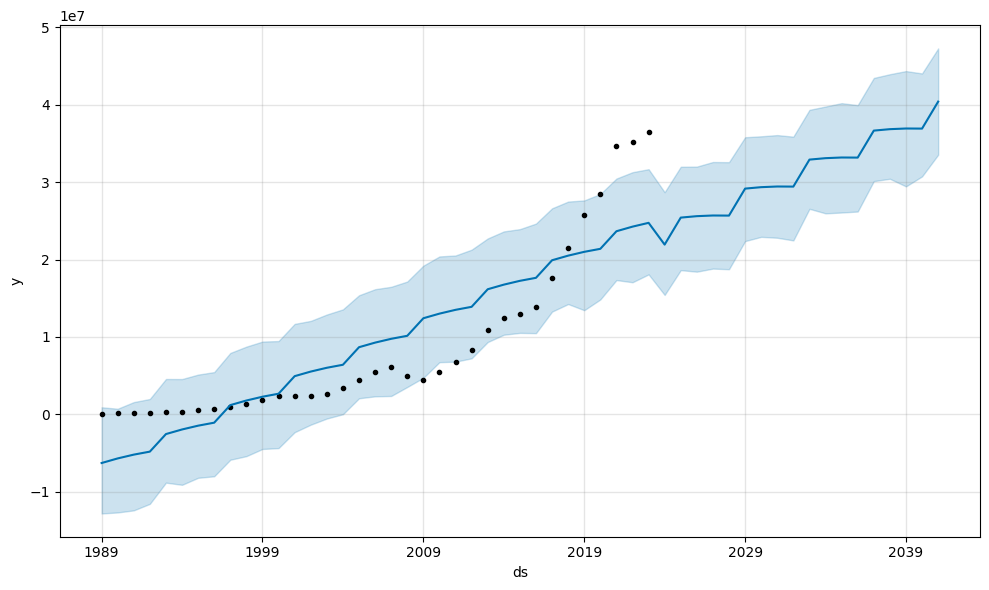

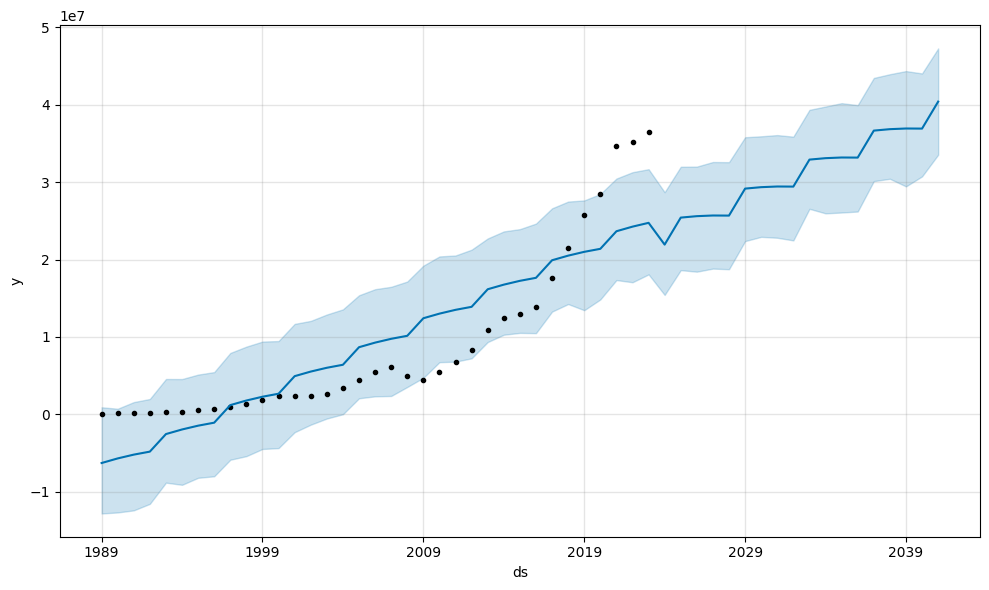

In [27]:
# Plot the Prophet predictions for gen x
model_genx.plot(forecast_genx)

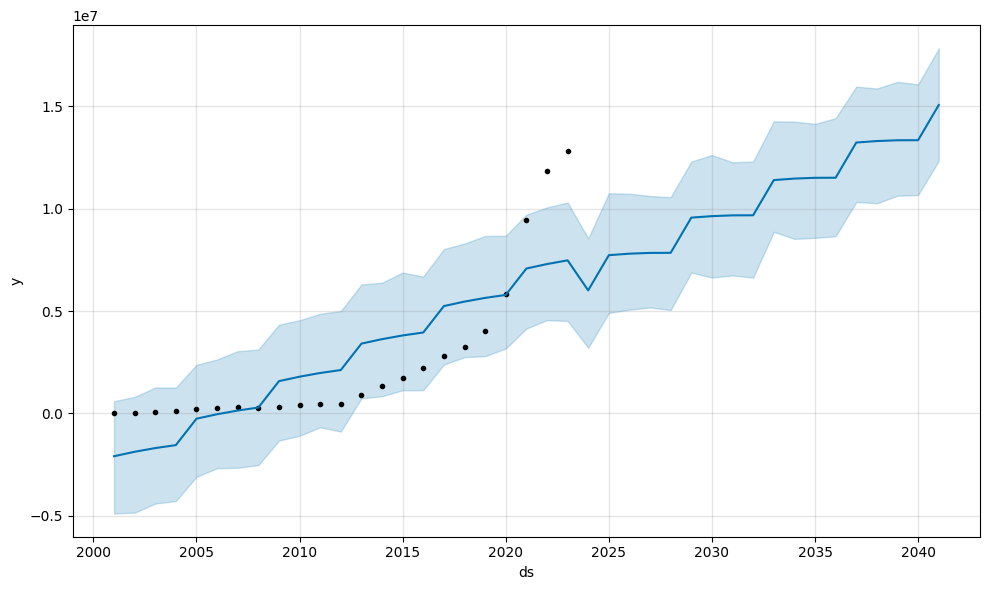

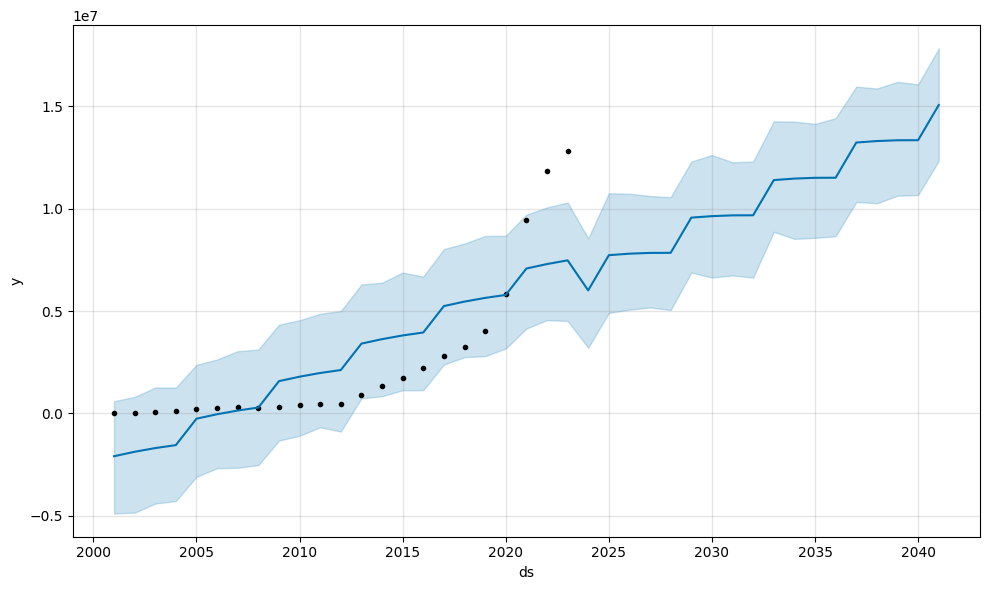

In [28]:
# Plot the Prophet predictions for millenial
model_millennial.plot(forecast_millenial)


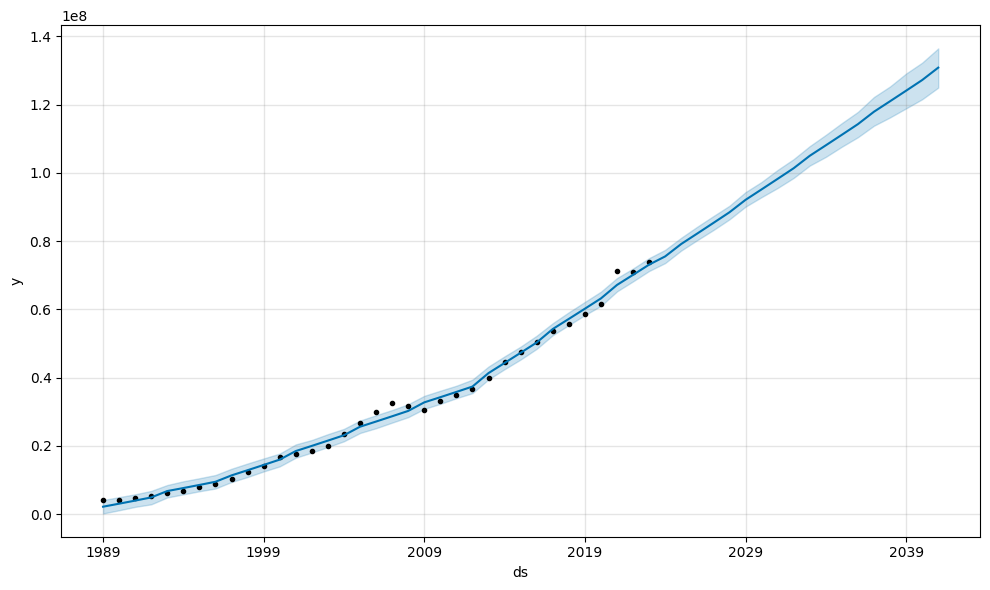

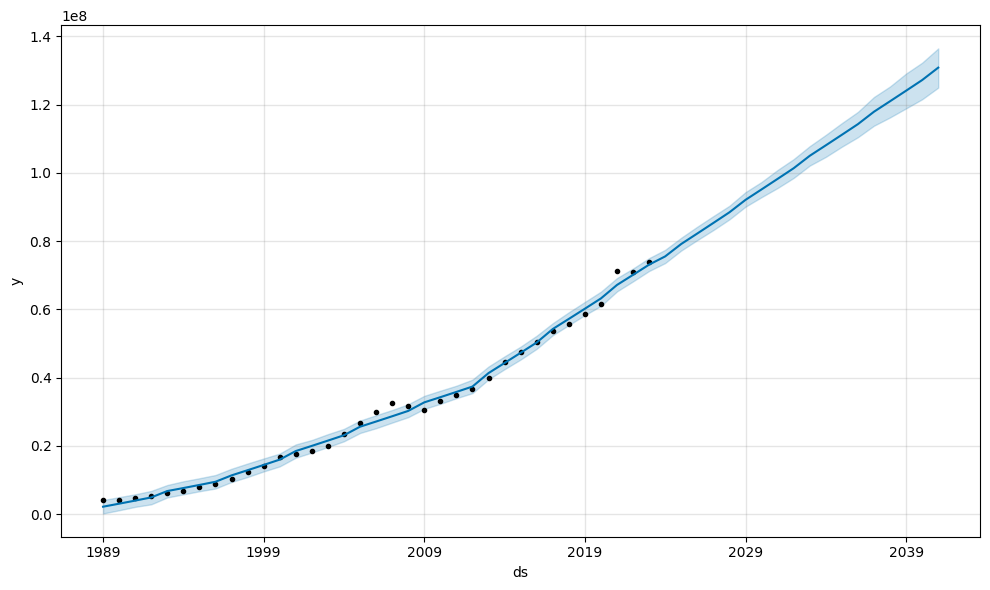

In [28]:
# Plot the Prophet predictions for boomer
model_boomer.plot(forecast_boomer)

In [29]:
# Set the index in the forecast_genx DataFrame to the ds datetime column
forecast_genx = forecast_genx.set_index('ds')

# Display the forecast_boomer DataFrame
forecast_genx.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2036-12-31,3.974561e+07,3.014430e+07,4.347854e+07,3.974318e+07,3.974837e+07,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,0.0,0.0,0.0,3.667111e+07
2037-12-31,4.068191e+07,3.044433e+07,4.396044e+07,4.067924e+07,4.068497e+07,-3.824799e+06,-3.824799e+06,-3.824799e+06,-3.824799e+06,-3.824799e+06,-3.824799e+06,0.0,0.0,0.0,3.685711e+07
2038-12-31,4.161820e+07,2.945858e+07,4.436395e+07,4.161522e+07,4.162162e+07,-4.675105e+06,-4.675105e+06,-4.675105e+06,-4.675105e+06,-4.675105e+06,-4.675105e+06,0.0,0.0,0.0,3.694310e+07
2039-12-31,4.255450e+07,3.075363e+07,4.406090e+07,4.255115e+07,4.255824e+07,-5.624167e+06,-5.624167e+06,-5.624167e+06,-5.624167e+06,-5.624167e+06,-5.624167e+06,0.0,0.0,0.0,3.693033e+07
2040-12-31,4.349336e+07,3.355272e+07,4.729295e+07,4.348973e+07,4.349742e+07,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,-3.074505e+06,0.0,0.0,0.0,4.041886e+07


In [30]:
# Set the index in the forecast_millenial DataFrame to the ds datetime column
forecast_millenial = forecast_millenial.set_index('ds')

# Display the forecast_boomer DataFrame
forecast_millenial.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2001-01-01,-1.844981e+06,-4.881641e+06,6.003208e+05,-1.844981e+06,-1.844981e+06,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,0.0,0.0,0.0,-2.087084e+06
2002-01-01,-1.387023e+06,-4.842273e+06,8.084914e+05,-1.387023e+06,-1.387023e+06,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,-4.826592e+05,0.0,0.0,0.0,-1.869683e+06
2003-01-01,-9.290661e+05,-4.398351e+06,1.267815e+06,-9.290661e+05,-9.290661e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,-7.598791e+05,0.0,0.0,0.0,-1.688945e+06
2004-01-01,-4.711087e+05,-4.275839e+06,1.267041e+06,-4.711087e+05,-4.711087e+05,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,-1.073427e+06,0.0,0.0,0.0,-1.544536e+06
2005-01-01,-1.189675e+04,-3.091028e+06,2.371818e+06,-1.189675e+04,-1.189675e+04,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,-2.421034e+05,0.0,0.0,0.0,-2.540002e+05


In [31]:
# Set the index in the forecast_boomer DataFrame to the ds datetime column
forecast_boomer = forecast_boomer.set_index('ds')

# Display the forecast_boomer DataFrame
forecast_boomer.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2036-12-31,1.179468e+08,1.140987e+08,1.223664e+08,1.142877e+08,1.219215e+08,-881.180622,-881.180622,-881.180622,-881.180622,-881.180622,-881.180622,0.0,0.0,0.0,1.179460e+08
2037-12-31,1.211741e+08,1.167140e+08,1.257577e+08,1.171395e+08,1.255542e+08,-163818.114115,-163818.114115,-163818.114115,-163818.114115,-163818.114115,-163818.114115,0.0,0.0,0.0,1.210103e+08
2038-12-31,1.244013e+08,1.195994e+08,1.293928e+08,1.199669e+08,1.290994e+08,-300814.281042,-300814.281042,-300814.281042,-300814.281042,-300814.281042,-300814.281042,0.0,0.0,0.0,1.241005e+08
2039-12-31,1.276286e+08,1.219900e+08,1.330045e+08,1.227033e+08,1.327407e+08,-411871.018050,-411871.018050,-411871.018050,-411871.018050,-411871.018050,-411871.018050,0.0,0.0,0.0,1.272167e+08
2040-12-31,1.308647e+08,1.254366e+08,1.367968e+08,1.255460e+08,1.364301e+08,-881.180621,-881.180621,-881.180621,-881.180621,-881.180621,-881.180621,0.0,0.0,0.0,1.308638e+08


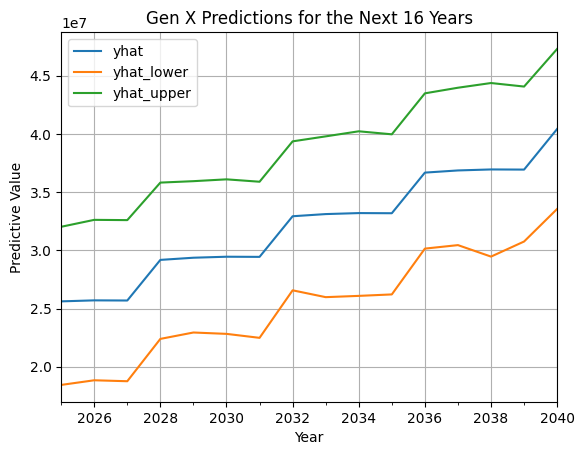

In [32]:
# Plot predictions for our gen x DataFrame for the
# last_16_years =
forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-16:].plot()

plt.title('Gen X Predictions for the Next 16 Years')
plt.xlabel('Year')
plt.ylabel('Predictive Value')
plt.grid(True)
plt.show()

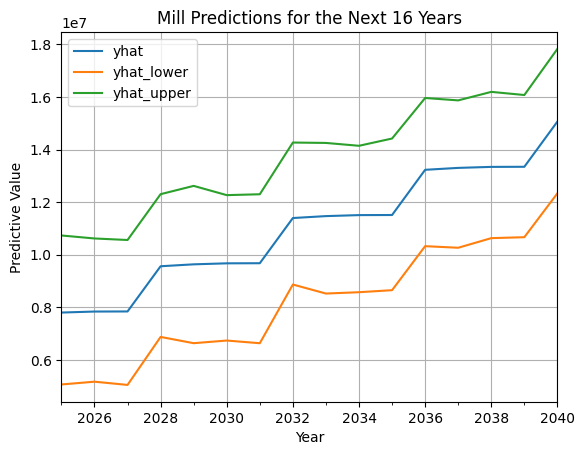

In [33]:
# Plot predictions for our millenial DataFrame for the
# last_16_years =
forecast_millenial[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-16:].plot()

plt.title('Mill Predictions for the Next 16 Years')
plt.xlabel('Year')
plt.ylabel('Predictive Value')
plt.grid(True)
plt.show()

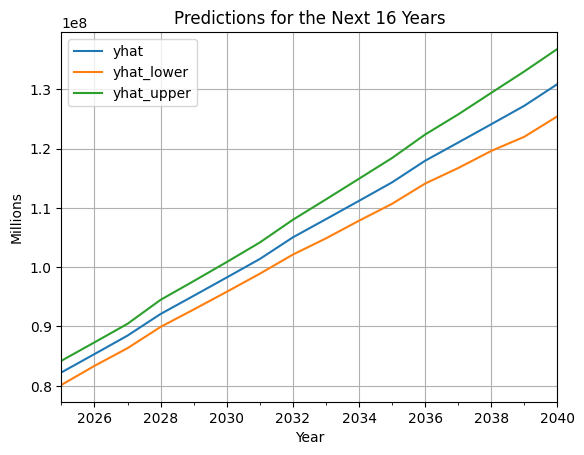

In [34]:
# Plot predictions for our boomer DataFrame for the
# last_16_years =
forecast_boomer[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-16:].plot()

plt.title('Predictions for the Next 16 Years')
plt.xlabel('Year')
plt.ylabel('Millions')
plt.grid(True)
plt.show()

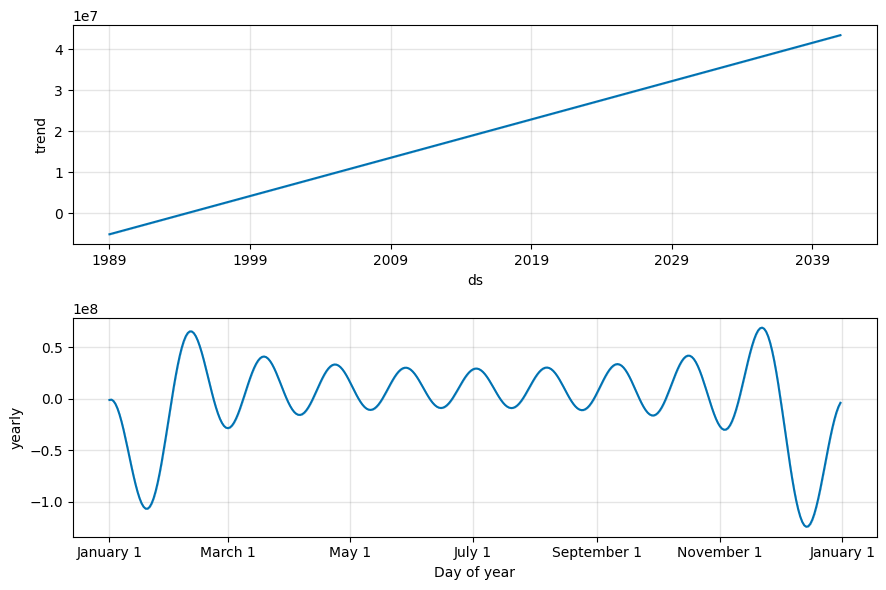

In [35]:
# Reset the index in the forecast_genx DataFrame
forecast_genx_reset_i = forecast_genx.reset_index()
# forecast_genx_reset_i


# Use the plot_components function to visualize the forecast results
# for the forecast_genx DataFrame

fig_genx = model_genx.plot_components(forecast_genx_reset_i)


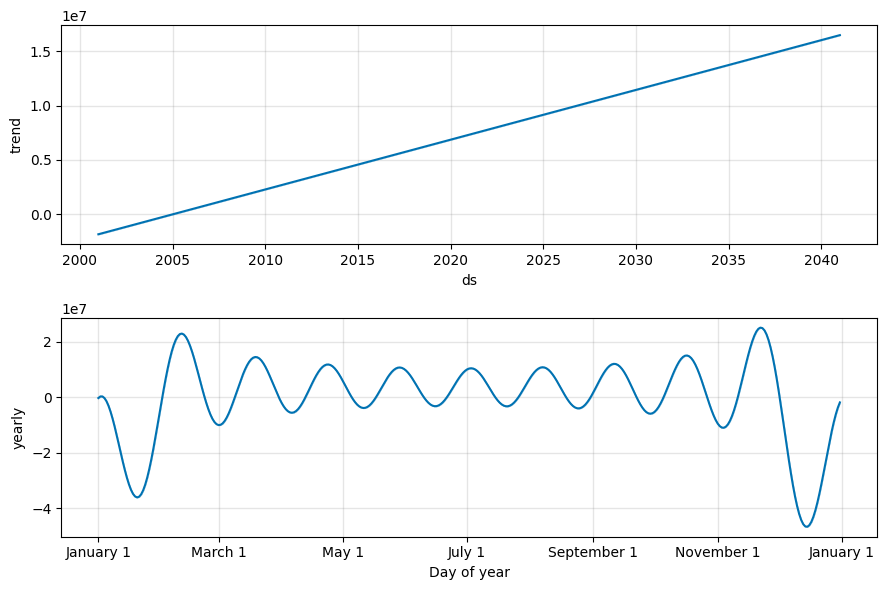

In [36]:
# Reset the index in the forecast_millenial DataFrame
forecast_millenial_reset_i = forecast_millenial.reset_index()
# forecast_millenial_reset_i


# Use the plot_components function to visualize the forecast results
# for the forecast_millenial DataFrame

fig_millenial = model_millennial.plot_components(forecast_millenial_reset_i)

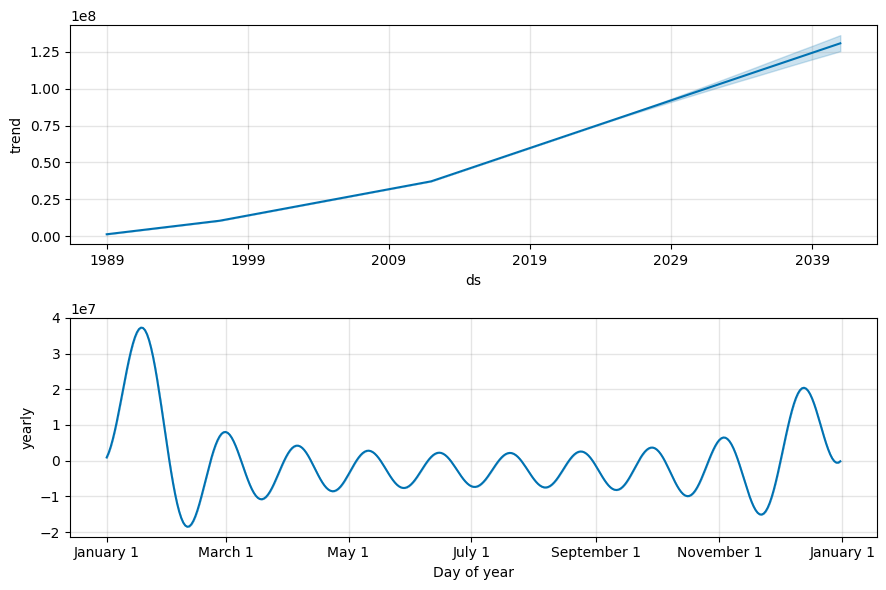

In [37]:
# Reset the index in the forecast_boomer DataFrame
forecast_boomer_reset_i = forecast_boomer.reset_index()
# forecast_boomer_reset_i


# Use the plot_components function to visualize the forecast results
# for the forecast_boomer DataFrame

fig_boomer = model_boomer.plot_components(forecast_boomer_reset_i)
